# ECG analyser

This is the third project from Machine Learning Engineer Nanodegree Program Udacity course (https://www.udacity.com/course/machine-learning-engineer-nanodegree--nd009t)

This project consists in predict if an Electrocardiogram (ECG) presents some disease or not. To
reach this goal, it will be compared two algorithms' answers and it will be check if it is possible to
detect a healthy (or not) signal, just understanding its measures.

### Dowloading data

The raw data is acquired by download at Kaggle (https://www.kaggle.com/shayanfazeli/heartbeat)

In [1]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('shayanfazeli/heartbeat', path='./data', unzip=True)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import heartpy as hp
import matplotlib.pyplot as plt


sample_rate=188 # Each row has 188 columns.
    
dfNormal = pd.read_csv('./data/ptbdb_normal.csv',header=None)

dfNormal.dropna()

dfNormal.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,0.487680,0.114305,0.000000,0.030116,0.065024,0.060917,0.050992,0.053388,0.051677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.000000,0.460381,0.122178,0.009296,0.125719,0.220009,0.267375,0.262948,0.260292,0.274015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,0.755102,0.135116,0.000000,0.285714,0.331457,0.256861,0.258269,0.253343,0.277270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.706176,0.323144,0.101684,0.013724,0.222707,0.285714,0.295696,0.325016,0.350593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Filtering signal

Heartpy is a toolkit that provides a lot of functions that handle with ECGs very well and it extracts the measures that will be used to predict.
Bellow it's possible to see the filter working.

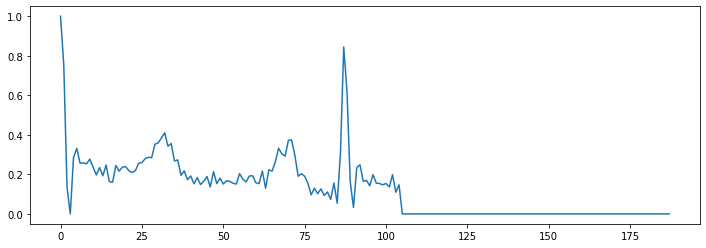

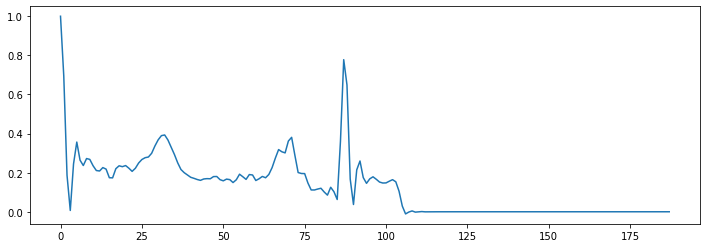

In [3]:
plt.figure(figsize=(12,4))
plt.plot(dfNormal.iloc[8])
plt.show()

dataF = hp.filter_signal(dfNormal.iloc[8], cutoff = 8, sample_rate = 25.0, order = 3, filtertype='lowpass')

plt.figure(figsize=(12,4))
plt.plot(dataF)
plt.show()

In [4]:
dfAbnormal = pd.read_csv('./data/ptbdb_abnormal.csv',header=None)

dfAbnormal.dropna()

dfAbnormal.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.999144,0.774829,0.522260,0.250856,0.000000,0.066781,0.093322,0.144692,0.154110,0.152397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.000000,0.871452,0.678353,0.357262,0.051196,0.000000,0.090707,0.142460,0.138564,0.185309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.000000,0.729630,0.583333,0.350926,0.279630,0.321296,0.267593,0.229630,0.218519,0.203704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.932234,0.810440,0.627595,0.422161,0.263126,0.145910,0.109280,0.088523,0.079976,0.073565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
def getMeasures(dfECG, sample_rate):

    df = pd.DataFrame()

    numIgnored = 0

    for i in range(0,len(dfECG)):
        try:
            filtered = hp.filter_signal(dfECG.iloc[i], cutoff = 8, sample_rate = 25.0, order = 3, filtertype='lowpass')
            w, m = hp.process(hp.scale_data(filtered), sample_rate) 
            dfM = pd.DataFrame([m])
            df = pd.concat([df,dfM])
        except:
            numIgnored +=1
            continue
    return numIgnored, df
    


In [7]:
numIg, dfNormalProcessed = getMeasures(dfNormal, sample_rate)

dfNormalProcessed["Class"]=0

dfNormalProcessed.fillna(0, inplace=True)

print("Droped by filter {} ECGs.".format(numIg))

dfNormalProcessed = dfNormalProcessed[dfNormalProcessed['bpm']!=0] # Delete the row where bpm is equals zero.

print(dfNormalProcessed.shape)


/home/robson/.local/lib/python3.8/site-packages/numpy/ma/core.py:5243: RuntimeWarning: Mean of empty slice.
  result = super(MaskedArray, self).mean(axis=axis,
/home/robson/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robson/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robson/.local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Droped by filter 32 ECGs.
(3722, 14)


In [8]:
dfNormalProcessed.head() # The features extract after filter the signal and pass through getMeasures function.

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,Class
0,322.285714,186.170213,180.851064,0,361.702128,1.0,1.0,180.851064,0.0,0.0,0.0,0.0,0.0,0
0,278.518519,215.425532,210.106383,0,420.212766,1.0,1.0,210.106383,0.0,0.0,0.0,0.0,0.0,0
0,5640.000000,10.638298,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
0,118.736842,505.319149,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
0,223.366337,268.617021,242.021277,0,484.042553,1.0,1.0,242.021277,0.0,0.0,0.0,0.0,0.0,0


In [10]:
numIg, dfAbnormalProcessed = getMeasures(dfAbnormal, sample_rate)

dfAbnormalProcessed["Class"]=1

dfAbnormalProcessed.fillna(0, inplace=True)

print("Droped by filter {} ECGs.".format(numIg))

dfAbnormalProcessed = dfAbnormalProcessed[dfAbnormalProcessed['bpm']!=0] # Delete the row where bpm is equals zero.

print(dfAbnormalProcessed.shape)

/home/robson/.local/lib/python3.8/site-packages/numpy/ma/core.py:5243: RuntimeWarning: Mean of empty slice.
  result = super(MaskedArray, self).mean(axis=axis,
/home/robson/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robson/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robson/.local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Droped by filter 360 ECGs.
(9170, 14)


In [11]:
dfAbnormalProcessed.head()

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,Class
0,88.818898,675.531915,0.000000,--,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
0,145.548387,412.234043,50.531915,0,101.06383,1.0,1.0,50.531915,0.0,0.0,0.0,0.0,0.0,1
0,103.486239,579.787234,0.000000,--,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
0,129.655172,462.765957,0.000000,--,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
0,105.420561,569.148936,0.000000,--,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1


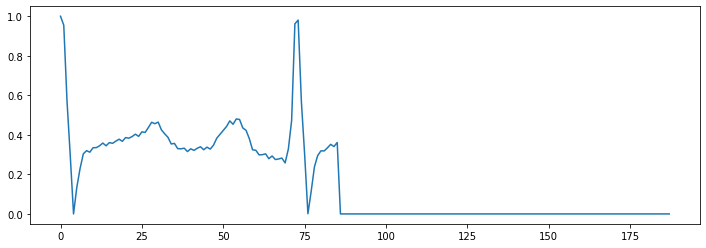

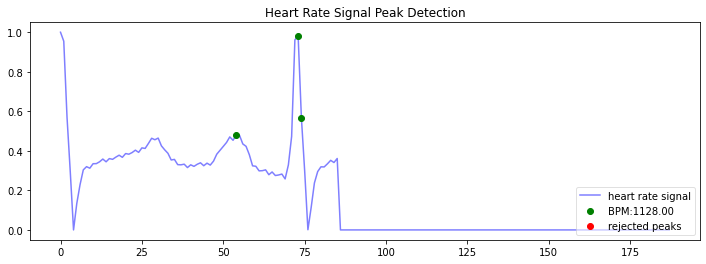

Normal measure.
bpm: 1128.000000
ibi: 53.191489
sdnn: 47.872340
sdsd: 0.000000
rmssd: 95.744681
pnn20: 1.000000
pnn50: 1.000000
hr_mad: 47.872340
sd1: 0.000000
sd2: 0.000000
s: 0.000000
sd1/sd2: nan
breathingrate: nan


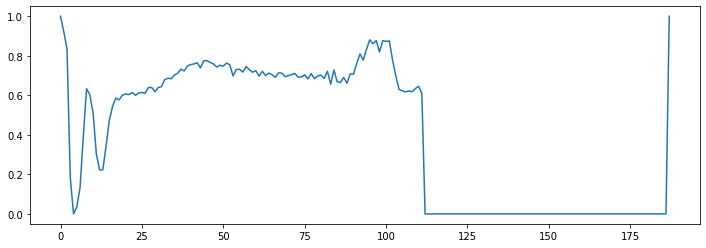

/home/robson/.local/lib/python3.8/site-packages/numpy/ma/core.py:5243: RuntimeWarning: Mean of empty slice.
  result = super(MaskedArray, self).mean(axis=axis,
/home/robson/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


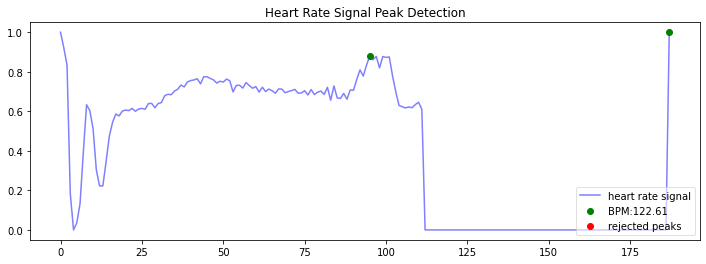

Abnormal measure.
bpm: 122.608696
ibi: 489.361702
sdnn: 0.000000
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: 0.000000
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


<ipython-input-9-69d8189c5809>:24: UserWarning: Warning: converting a masked element to nan.
  print('%s: %f' %(measure, m[measure]))


In [13]:
# Just checking
plt.figure(figsize=(12,4))
plt.plot(dfNormal.iloc[30])
plt.show()

wd, m = hp.process(dfNormal.iloc[30], sample_rate)
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

print("Normal measure.")
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

plt.figure(figsize=(12,4))
plt.plot(dfAbnormal.iloc[30])
plt.show()

wd, m = hp.process(dfAbnormal.iloc[30], sample_rate)
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

print("Abnormal measure.")
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [14]:
# Join normal and abnormal dataframes

completeDf=pd.concat([dfNormalProcessed, dfAbnormalProcessed])

completeDf = completeDf.sample(frac=1)

completeDf

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,Class
0,289.230769,207.446809,90.425532,0,180.851064,1.0,1.0,90.425532,0.0,0.0,0.0,0.0,0.0,1
0,102.545455,585.106383,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
0,247.912088,242.021277,236.702128,0,473.404255,1.0,1.0,236.702128,0.0,0.0,0.0,0.0,0.0,1
0,262.325581,228.723404,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
0,275.121951,218.085106,106.382979,0,212.765957,1.0,1.0,106.382979,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,11280.000000,5.319149,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
0,126.741573,473.404255,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
0,223.366337,268.617021,178.191489,0,356.382979,1.0,1.0,178.191489,0.0,0.0,0.0,0.0,0.0,0
0,5640.000000,10.638298,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0


In [16]:
# Just checking
completeDfClass = completeDf.iloc[:,13:14]
completeDfClass

,Class
0,1
0,1
0,1
0,1
0,0
...,...
0,0
0,1
0,0
0,0


In [18]:
# Just checking
completeDf.iloc[:,0:13]

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
0,289.230769,207.446809,90.425532,0,180.851064,1.0,1.0,90.425532,0.0,0.0,0.0,0.0,0.0
0,102.545455,585.106383,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,247.912088,242.021277,236.702128,0,473.404255,1.0,1.0,236.702128,0.0,0.0,0.0,0.0,0.0
0,262.325581,228.723404,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,275.121951,218.085106,106.382979,0,212.765957,1.0,1.0,106.382979,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,11280.000000,5.319149,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,126.741573,473.404255,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0,223.366337,268.617021,178.191489,0,356.382979,1.0,1.0,178.191489,0.0,0.0,0.0,0.0,0.0
0,5640.000000,10.638298,0.000000,--,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Normalizing by z-score (new_data = (data-mean)/standard_deviation).
The z-score garatees a mean iguals zero and standard deviation iguals 1, and it makes easy for the
algorithms the comparison between features.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sc = scaler.fit(completeDf.iloc[:,0:13])
completeNormalizedDf=sc.transform(completeDf.iloc[:,0:13])

completeNormalizedDf = pd.DataFrame(completeNormalizedDf)

/home/robson/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/robson/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


In [21]:
# Just checking
completeNormalizedDf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.135995,-0.959026,0.353153,0.0,0.353153,1.213692,1.267914,0.353153,0.0,0.0,0.0,0.0,0.0
1,-0.249803,1.217084,-0.679403,NaN,-0.679403,-0.823932,-0.788697,-0.679403,0.0,0.0,0.0,0.0,0.0
2,-0.161184,-0.759805,2.023464,0.0,2.023464,1.213692,1.267914,2.023464,0.0,0.0,0.0,0.0,0.0
3,-0.152397,-0.836429,-0.679403,NaN,-0.679403,-0.823932,-0.788697,-0.679403,0.0,0.0,0.0,0.0,0.0
4,-0.144596,-0.897728,0.535368,0.0,0.535368,1.213692,1.267914,0.535368,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,6.564260,-2.123705,-0.679403,NaN,-0.679403,-0.823932,-0.788697,-0.679403,0.0,0.0,0.0,0.0,0.0
12888,-0.235052,0.573445,-0.679403,NaN,-0.679403,-0.823932,-0.788697,-0.679403,0.0,0.0,0.0,0.0,0.0
12889,-0.176147,-0.606558,1.355339,0.0,1.355339,1.213692,1.267914,1.355339,0.0,0.0,0.0,0.0,0.0
12890,3.125972,-2.093056,-0.679403,NaN,-0.679403,-0.823932,-0.788697,-0.679403,0.0,0.0,0.0,0.0,0.0


In [23]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(completeNormalizedDf,completeDfClass, test_size=0.5, random_state=42)

print(('X_train length = {} - y_train length = {}').format(len(X_train),len(y_train)))
print(('X_test length = {} - y_test length = {}').format(len(X_test),len(y_test)))

X_train length = 6446 - y_train length = 6446
X_test length = 6446 - y_test length = 6446


In [24]:
# Dividing test data in test and validation
X_valid, X_test1, y_valid, y_test1 = train_test_split(X_test, y_test, test_size=0.85, random_state=42)

# Just checking
print(('X_test length = {} - y_test length = {}').format(len(X_test1),len(y_test1)))
print(('X_valid length = {} - y_valid length = {}').format(len(X_valid),len(y_valid)))

X_test length = 5480 - y_test length = 5480
X_valid length = 966 - y_valid length = 966


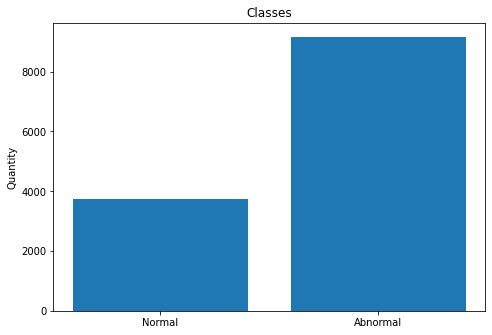

In [25]:
# Just checking the unbalanced data
fig = plt.figure()
ax = fig.add_axes([0,0, 1, 1])
classesTitles = ['Normal', 'Abnormal']
classes = completeDf.iloc[:,13:14]

healthy = classes[classes["Class"]==0]
sick = classes[classes["Class"]==1]

ax.bar(classesTitles,[len(healthy), len(sick)])
ax.set_title('Classes')
ax.set_ylabel('Quantity')
plt.show()

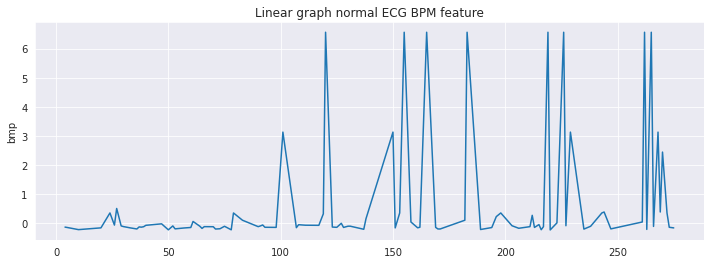

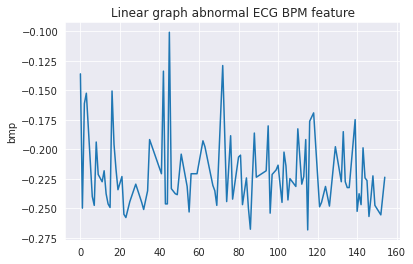

In [26]:
# Just a comparison of features and classes

plt.figure(figsize=(12,4))

bpms = completeNormalizedDf.iloc[:,0:1]

completeDfClass.reset_index(drop=True, inplace=True)

bpmsNormal = bpms[completeDfClass["Class"]==0]

plt.plot(bpmsNormal.iloc[0:100])

plt.ylabel('bmp')  
  
plt.title("Linear graph normal ECG BPM feature") 

plt.show()

bpmsAbnormal = bpms[completeDfClass["Class"]==1]

plt.plot(bpmsAbnormal.iloc[0:100])
plt.ylabel('bmp')  
  
plt.title("Linear graph abnormal ECG BPM feature") 
plt.show()

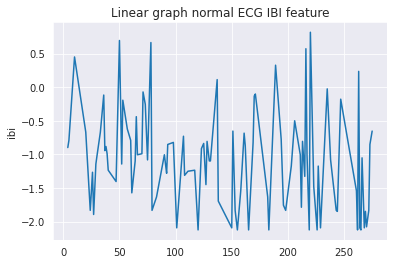

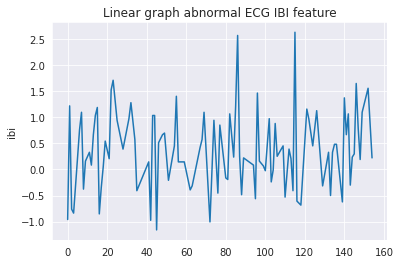

In [27]:
bpms = completeNormalizedDf.iloc[:,1:2]

completeDfClass.reset_index(drop=True, inplace=True)

bpmsNormal = bpms[completeDfClass["Class"]==0]

plt.plot(bpmsNormal.iloc[0:100])
plt.ylabel('ibi')  
  
plt.title("Linear graph normal ECG IBI feature") 

plt.show()

bpmsAbnormal = bpms[completeDfClass["Class"]==1]

plt.plot(bpmsAbnormal.iloc[0:100])
plt.ylabel('ibi')  
  
plt.title("Linear graph abnormal ECG IBI feature") 
plt.show()

# Set up and upload the data

In [28]:
import os
import boto3
import re
import sagemaker
from sagemaker import get_execution_role


role = get_execution_role()
region = boto3.Session().region_name
boto = boto3.Session()
sagemaker_session = sagemaker.Session(boto3.Session())
print(region)
bucket = sagemaker_session.default_bucket()
print(bucket)
prefix = 'sagemaker/ECG-data'
prefix_refined = 'sagemaker/ECG-data_new_refined'
%mkdir -p data/dataset
%mkdir -p data/dataset/refined
data_dir='./data/dataset'
data_dir_refined='./data/dataset/refined'

us-east-2
sagemaker-us-east-2-214237513994


In [29]:
def write_to_s3(local_directory, work_directory):
    return sagemaker_session.upload_data(local_directory, key_prefix=work_directory)

In [30]:
import pandas as pd
import torch

y_train.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)

y_test1.reset_index(drop=True, inplace=True)
X_test1.reset_index(drop=True, inplace=True)

y_valid.reset_index(drop=True, inplace=True)
X_valid.reset_index(drop=True, inplace=True)

pd.concat([y_train, X_train], axis=1) \
        .to_csv(os.path.join(data_dir, 'train'), header=False, index=False)

pd.concat([y_test1, X_test1], axis=1) \
        .to_csv(os.path.join(data_dir, 'test'), header=False, index=False)


pd.concat([y_valid, X_valid], axis=1) \
        .to_csv(os.path.join(data_dir, 'valid'), header=False, index=False)


#Saving all data.
s3_input_train = write_to_s3(data_dir, prefix)

# Tuning XGBoost

Like the dataset is very unbalanced, it was chosen XGBoost as first algorithm to classify this
kind of data, because it can handle very well with this issue.
Bellow, it is possible to see the 2 ways of training and deploy: By boto3 library and Sklearn framework.

In [31]:
from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(sagemaker_session.boto_region_name, 'xgboost')

estimatorXgb = sagemaker.estimator.Estimator(container, 
                                    role,      
                                    train_instance_count=1, 
                                    train_instance_type='ml.m4.xlarge', 
                                    output_path='s3://{}/{}/output'.format(sagemaker_session.default_bucket(), prefix),
                                    sagemaker_session=sagemaker_session)

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
	get_image_uri(region, 'xgboost', '1.0-1').


In [32]:
estimatorXgb.set_hyperparameters(max_depth=5,
                                eta=0.2,
                                gamma=4,
                                colsample_bytree=0.3,
                                min_child_weight=6,
                                subsample=0.8,
                                objective="binary:logistic",
                                learning_rate=0.03,
                                scale_pos_weight=9,
                                num_round=200)

In [33]:
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner

xgb_hyperparameter_tuner = HyperparameterTuner(estimator = estimatorXgb, 
                                               objective_metric_name = 'validation:rmse', 
                                               objective_type = 'Minimize', 
                                               max_jobs = 20,
                                               max_parallel_jobs = 4, 
                                               hyperparameter_ranges = {
                                                    'max_depth': IntegerParameter(3, 12),
                                                    'eta'      : ContinuousParameter(0.05, 0.5),
                                                    'min_child_weight': IntegerParameter(2, 8),
                                                    'subsample': ContinuousParameter(0.5, 0.9),
                                                    'gamma': IntegerParameter(0, 10),
                                                    'colsample_bytree':ContinuousParameter(0.1, 0.6),
                                               })

In [34]:
from sagemaker.session import s3_input

xgb_hyperparameter_tuner.fit({'train': s3_input('s3://{}/{}/train'.format(sagemaker_session.default_bucket(), prefix), content_type="text/csv"), 
                              'validation':s3_input('s3://{}/{}/valid'.format(sagemaker_session.default_bucket(), prefix), content_type="text/csv")})

In [35]:
xgb_hyperparameter_tuner.wait()

....................................................................................................................................................................................................!


In [36]:
training_job_name = xgb_hyperparameter_tuner.best_training_job()
desc = sagemaker_session.sagemaker_client.describe_training_job(TrainingJobName=training_job_name)
xgb_hyper_parameters = desc["HyperParameters"]
xgb_hyper_parameters.pop('_tuning_objective_metric')
xgb_hyper_parameters

{'colsample_bytree': '0.5942246874135562',
 'eta': '0.1570389955204472',
 'gamma': '0',
 'learning_rate': '0.03',
 'max_depth': '11',
 'min_child_weight': '2',
 'num_round': '200',
 'objective': 'binary:logistic',
 'scale_pos_weight': '9',
 'subsample': '0.787644075752256'}

In [38]:
from time import gmtime, strftime

model_name='xgb-model-{}'.format(strftime("%Y-%m-%d-%H-%M-%S", gmtime()))

sm = boto.client('sagemaker')

info = sm.describe_training_job(TrainingJobName=training_job_name)
model_data = info['ModelArtifacts']['S3ModelArtifacts']
print(model_data)

env_dic = {key.upper() : value.strip('"\'') for key, value in info['HyperParameters'].items()}

primary_container = {
                'Image': container,
                'ModelDataUrl': model_data,
                'Environment':env_dic
            }

iam = boto.client('iam')

role_description = iam.get_role(
    RoleName=role
)

role_arn = role_description['Role']['Arn']

create_model_response = sm.create_model(
    ModelName = model_name,
    ExecutionRoleArn = role_arn,
    PrimaryContainer = primary_container)

print(create_model_response['ModelArn'])

s3://sagemaker-us-east-2-214237513994/sagemaker/ECG-data/output/xgboost-201006-1627-015-0641327a/output/model.tar.gz
arn:aws:sagemaker:us-east-2:214237513994:model/xgb-model-2020-10-06-20-35-45


In [39]:
endpoint_config_name = 'XGBoostEndpointConfig-' + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print(endpoint_config_name)
create_endpoint_config_response = sm.create_endpoint_config(
    EndpointConfigName = endpoint_config_name,
    ProductionVariants=[{
        'InstanceType':'ml.m4.xlarge',
        'InitialVariantWeight':1,
        'InitialInstanceCount':1,
        'ModelName':model_name,
        'VariantName':'AllTraffic'}])

XGBoostEndpointConfig-2020-10-06-20-49-52


In [40]:
%%time
import time

endpoint_name = 'XGBoostEndpoint-' + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print(endpoint_name)
create_endpoint_response = sm.create_endpoint(
    EndpointName=endpoint_name,
    EndpointConfigName=endpoint_config_name)
print(create_endpoint_response['EndpointArn'])

resp = sm.describe_endpoint(EndpointName=endpoint_name)
status = resp['EndpointStatus']
while status=='Creating':
    print("Status: " + status)
    time.sleep(60)
    resp = sm.describe_endpoint(EndpointName=endpoint_name)
    status = resp['EndpointStatus']

print("Arn: " + resp['EndpointArn'])
print("Status: " + status)

XGBoostEndpoint-2020-10-06-20-56-08
arn:aws:sagemaker:us-east-2:214237513994:endpoint/xgboostendpoint-2020-10-06-20-56-08
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Arn: arn:aws:sagemaker:us-east-2:214237513994:endpoint/xgboostendpoint-2020-10-06-20-56-08
Status: InService
CPU times: user 269 ms, sys: 20.1 ms, total: 290 ms
Wall time: 8min 6s


### Testing the model

In [41]:
import math

runtime_client = boto.client('sagemaker-runtime')

X_test1.to_csv('/tmp/test', index=False, header=False)

with open('/tmp/test',"r",encoding='utf-8') as data_test:
    dataset = data_test.read().strip()    
    
response = runtime_client.invoke_endpoint(EndpointName=endpoint_name, 
                               ContentType='text/csv', 
                               Body=dataset)

result = response['Body'].read()
result = result.decode("utf-8")
result = result.split(',')
result = [np.round(float(i)) for i in result]

In [42]:
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def conf_matrix(real_arr,predict_arr):
    tn, fp, fn, tp = confusion_matrix(real_arr, predict_arr, labels = [0,1]).ravel()
    print("Confusion matrix")
    print("True Positive:",tp)
    print("False Positive:",fp)
    print("False Negative",fn)
    print("True Negative:",tn)
    print(" ")
    print("Metrics")
    print(" ")
    fpr, tpr, thresholds = metrics.roc_curve(real_arr, predict_arr)
    print("Accuracy:",accuracy_score(real_arr, predict_arr))
    print("AUC:", metrics.auc(fpr, tpr))
    print("Precision:",precision_score(real_arr, predict_arr))
    print("Recall:",recall_score(real_arr,predict_arr))
    print("F1-Score:",f1_score(real_arr, predict_arr))

In [43]:
conf_matrix(y_test1, result)

Confusion matrix
True Positive: 3821
False Positive: 608
False Negative 106
True Negative: 945
 
Metrics
 
Accuracy: 0.8697080291970803
AUC: 0.7907535314072945
Precision: 0.8627229622939715
Recall: 0.9730073847720907
F1-Score: 0.9145524174246051


In [44]:
sm.delete_endpoint(EndpointName=endpoint_name)

{'ResponseMetadata': {'RequestId': 'fbe94948-30f2-4108-9ffd-f67135086184',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'fbe94948-30f2-4108-9ffd-f67135086184',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'date': 'Tue, 06 Oct 2020 23:17:35 GMT'},
  'RetryAttempts': 0}}

To compare models it was using PyCaret(https://pycaret.org/) to choose the better algorithm that matches with this kind of data.

In [46]:
import pycaret
from pycaret.classification import *                      
from pycaret.utils import enable_colab                

train = pd.read_csv('./data/dataset/train', names=['Class','bpm','ibi','sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad',
                                                     'sd1', 'sd2',  's', 'sd1/sd2', 'breathingrate'])

classe = setup(data = train,           
              target = 'Class')

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8852,0.9392,0.9385,0.9037,0.9207,0.7132,0.7153,1.9184
1,Gradient Boosting Classifier,0.8825,0.9372,0.9375,0.9012,0.9189,0.7060,0.7083,0.2467
2,Light Gradient Boosting Machine,0.8821,0.9391,0.9419,0.8975,0.9190,0.7027,0.7063,0.0835
3,Extreme Gradient Boosting,0.8819,0.9376,0.9403,0.8982,0.9187,0.7031,0.7060,0.2337
4,Ada Boost Classifier,0.8768,0.9273,0.9410,0.8918,0.9156,0.6879,0.6922,0.1134
5,Random Forest Classifier,0.8757,0.9212,0.9335,0.8960,0.9142,0.6886,0.6911,0.0229
6,Decision Tree Classifier,0.8743,0.8672,0.9294,0.8974,0.9130,0.6868,0.6886,0.0087
7,Extra Trees Classifier,0.8741,0.8995,0.9329,0.8945,0.9132,0.6844,0.6869,0.1093
8,Logistic Regression,0.8726,0.9252,0.9360,0.8904,0.9125,0.6784,0.6817,0.0674
9,K Neighbors Classifier,0.8726,0.9097,0.9219,0.9011,0.9113,0.6850,0.6860,0.0112


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7f94baee7e20>
INFO:logs:compare_models() succesfully completed......................................


### Training CatBoost Classifier

In [48]:
!pygmentize ./train.py

#!/usr/bin/env python
# coding: utf-8

import os
import argparse
import json
import pandas as pd
import numpy as np
os.system('pip install joblib==0.16.0')
import joblib
import sys
os.system('pip install imblearn')
os.system('pip install catboost')
os.system('pip install sagemaker==1.69.0')
os.system('pip install s3fs==0.4.2')
from catboost import CatBoostClassifier, Pool
import boto3
import sagemaker


if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    # Hyperparameters are described here
    parser.add_argument('--learning_rate', type=float, default=0.03)
    
    
    # SageMaker specific arguments. Defaults are set in the environment variables.
    parser.add_argument('--model_dir', type=str, default=os.environ.get('SM_MODEL_DIR'))
    parser.add_argument('--train', type=str, default=os.environ['SM_CHANNEL_TRAIN'])
    parser.add_argument('--validation', type=str, default=os.environ['SM_CHANNEL_VALIDATION'])
    
    args = parser.parse_args()   
    
    print(a

In [49]:
from sagemaker.sklearn.estimator import SKLearn

FRAMEWORK_VERSION = "0.23-1"

estimator = SKLearn(entry_point ='./train.py',
        hyperparameters={"learning_rate":0.03},
        role=role,
        train_instance_count=1,
        train_instance_type="ml.m5.xlarge",
        sagemaker_session=sagemaker_session,
        framework_version=FRAMEWORK_VERSION)

In [50]:
estimator.fit({'train': 's3://{}/{}/train'.format(sagemaker_session.default_bucket(), prefix), 
               'validation':'s3://{}/{}/valid'.format(sagemaker_session.default_bucket(), prefix)})


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


2020-10-07 15:07:37 Starting - Starting the training job...
2020-10-07 15:07:39 Starting - Launching requested ML instances......
2020-10-07 15:08:55 Starting - Preparing the instances for training...
2020-10-07 15:09:41 Downloading - Downloading input data...
2020-10-07 15:10:04 Training - Downloading the training image..2020-10-07 15:10:31,095 sagemaker-training-toolkit INFO     Imported framework sagemaker_sklearn_container.training
2020-10-07 15:10:31,098 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2020-10-07 15:10:31,113 sagemaker_sklearn_container.training INFO     Invoking user training script.
2020-10-07 15:10:31,404 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2020-10-07 15:10:31,417 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2020-10-07 15:10:31,427 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2020-10-07 15:10:31,436 sagemak


2020-10-07 15:10:30 Training - Training image download completed. Training in progress.Successfully installed catboost-0.24.1 cycler-0.10.0 graphviz-0.14.2 kiwisolver-1.2.0 matplotlib-3.3.2 plotly-4.11.0 pyparsing-2.4.7
  Created wheel for sagemaker: filename=sagemaker-1.69.0-py2.py3-none-any.whl size=384831 sha256=7e58bdde37267ff344ea430fae11fabddfa9036cd09b1ee69cbf5dfcfe17d779
  Stored in directory: /root/.cache/pip/wheels/22/12/39/9e4997a00659893f373841a33f1c5be8bc03871fed05d4f1b3
  Created wheel for protobuf3-to-dict: filename=protobuf3_to_dict-0.1.5-py3-none-any.whl size=4030 sha256=db03527c1434beb0199b2b434567706c4b99597a010cfeff9fc3930a40065f44
  Stored in directory: /root/.cache/pip/wheels/ce/a0/8b/995ce2fbaf0e9fe7eb91da84e99e84d1b35cfaa555f2b8f1c7
Successfully built sagemaker protobuf3-to-dict
/opt/ml/input/data/train
/opt/ml/input/data/validation
           bpm       ibi      sdnn  sdsd  ...  sd1  sd2    s  sd1/sd2
0    -0.181335 -0.545259  1.476817   0.0  ...  0.0  0.0  0.0

In [51]:
predictor = estimator.deploy(initial_instance_count=1, instance_type="ml.m4.xlarge")

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


----------------!

### Testing the model

In [52]:
cbc_result = predictor.predict(X_test1)
cbc_result

array([1, 0, 1, ..., 1, 0, 0])

In [54]:
conf_matrix(y_test1, cbc_result)

Confusion matrix
True Positive: 3601
False Positive: 393
False Negative 246
True Negative: 1240
 
Metrics
 
Accuracy: 0.8833941605839416
AUC: 0.8476963543219511
Precision: 0.9016024036054081
Recall: 0.9360540681050169
F1-Score: 0.9185052926922587


In [55]:
estimator.delete_endpoint()

# Trying improve the models

To see what happen if only the features that is in top 5 of correlation do with the response of each algorithm, it was used a random forest to detect which are those features and reprocess all steps did above.

In [56]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_trainRF = X_train.copy()
y_trainRF = y_train.copy()

X_trainRF.columns = ['bpm','ibi','sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad',
                                                     'sd1', 'sd2',  's', 'sd1/sd2', 'breathingrate']

X_trainRF.fillna(0, inplace=True)

y_trainRF.columns = ['Class']

X_testRF = X_test.copy()

X_testRF.columns = ['bpm','ibi','sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad',
                                                     'sd1', 'sd2',  's', 'sd1/sd2', 'breathingrate']

X_testRF.fillna(0, inplace=True)

y_testRF = y_test.copy()


y_testRF.columns = ['Class']


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_trainRF, y_trainRF)
print("Accuracy on test data: {}".format(clf.score(X_testRF, y_testRF)))

<ipython-input-60-da62f5bea823>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_trainRF, y_trainRF)


Accuracy on test data: 0.8814768848898542


The permutation_importance shows the most important features in the dataset.

<ipython-input-61-c252b2caee25>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(X_trainRF.columns[tree_importance_sorted_idx])


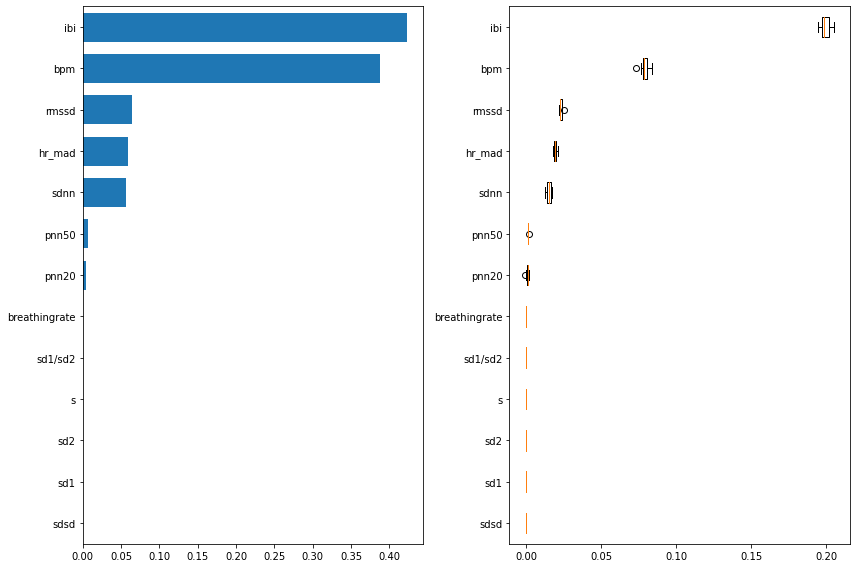

In [57]:
result = permutation_importance(clf, X_trainRF, y_trainRF, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X_trainRF.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_trainRF.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

# The top 5 features

In [58]:
new_X_train = X_trainRF[["ibi","bpm", "rmssd", "hr_mad", "sdnn"]]
new_X_test = X_testRF[["ibi","bpm", "rmssd", "hr_mad", "sdnn"]]

,ibi,bpm,rmssd,hr_mad,sdnn
10712,1.339681,-0.251996,-0.679403,-0.679403,-0.679403
1954,-0.315388,-0.197707,-0.679403,-0.679403,-0.679403
8,-1.449417,-0.013335,-0.679403,-0.679403,-0.679403
9198,1.860722,-0.259824,-0.679403,-0.679403,-0.679403
7403,0.220977,-0.223587,0.201306,0.201306,0.201306
...,...,...,...,...,...
10287,0.604095,-0.235911,-0.679403,-0.679403,-0.679403
11250,-1.832535,0.342595,-0.284603,-0.284603,-0.284603
5480,-0.208115,-0.204025,1.719771,1.719771,1.719771
10125,0.251626,-0.224717,0.140568,0.140568,0.140568


In [60]:
new_X_valid, new_X_test1, new_y_valid, new_y_test1 = train_test_split(new_X_test, y_testRF, test_size=0.85, random_state=42)

# Just checking
print(('X_test length = {} - y_test length = {}').format(len(new_X_test1),len(new_y_test1)))
print(('X_valid length = {} - y_valid length = {}').format(len(new_X_valid),len(new_y_valid)))

X_test length = 5480 - y_test length = 5480
X_valid length = 966 - y_valid length = 966


In [61]:
y_trainRF.reset_index(drop=True, inplace=True)
new_X_train.reset_index(drop=True, inplace=True)

new_y_test1.reset_index(drop=True, inplace=True)
new_X_test1.reset_index(drop=True, inplace=True)

new_y_valid.reset_index(drop=True, inplace=True)
new_X_valid.reset_index(drop=True, inplace=True)

pd.concat([y_trainRF, new_X_train], axis=1) \
        .to_csv(os.path.join(data_dir_refined, 'train'), header=False, index=False)

pd.concat([new_y_test1, new_X_test1], axis=1) \
        .to_csv(os.path.join(data_dir_refined, 'test'), header=False, index=False)


pd.concat([new_y_valid, new_X_valid], axis=1) \
        .to_csv(os.path.join(data_dir_refined, 'valid'), header=False, index=False)


#Saving all data.
s3_input_train = write_to_s3(data_dir_refined, prefix+"_new_refined")

# Tuning again

In [62]:
container = get_image_uri(sagemaker_session.boto_region_name, 'xgboost')

estimatorXgb = sagemaker.estimator.Estimator(container, 
                                    role,      
                                    train_instance_count=1, 
                                    train_instance_type='ml.m4.xlarge', 
                                    output_path='s3://{}/{}/output'.format(sagemaker_session.default_bucket(), prefix),
                                    sagemaker_session=sagemaker_session)

	get_image_uri(region, 'xgboost', '1.0-1').


In [63]:
estimatorXgb.set_hyperparameters(max_depth=5,
                                eta=0.2,
                                gamma=4,
                                colsample_bytree=0.3,
                                min_child_weight=6,
                                subsample=0.8,
                                objective="binary:logistic",
                                learning_rate=0.03,
                                scale_pos_weight=9,
                                num_round=200)

In [64]:
xgb_hyperparameter_tuner = HyperparameterTuner(estimator = estimatorXgb, 
                                               objective_metric_name = 'validation:rmse', 
                                               objective_type = 'Minimize', 
                                               max_jobs = 20,
                                               max_parallel_jobs = 4, 
                                               hyperparameter_ranges = {
                                                    'max_depth': IntegerParameter(3, 12),
                                                    'eta'      : ContinuousParameter(0.05, 0.5),
                                                    'min_child_weight': IntegerParameter(2, 8),
                                                    'subsample': ContinuousParameter(0.5, 0.9),
                                                    'gamma': IntegerParameter(0, 10),
                                                    'colsample_bytree':ContinuousParameter(0.1, 0.6),
                                               })

In [65]:
xgb_hyperparameter_tuner.fit({'train': s3_input('s3://{}/{}/train'.format(sagemaker_session.default_bucket(), prefix_refined), content_type="text/csv"), 
                              'validation':s3_input('s3://{}/{}/valid'.format(sagemaker_session.default_bucket(), prefix_refined), content_type="text/csv")})

In [66]:
xgb_hyperparameter_tuner.wait()

............................................................................................................................................................................................!


In [67]:
training_job_name = xgb_hyperparameter_tuner.best_training_job()
desc = sagemaker_session.sagemaker_client.describe_training_job(TrainingJobName=training_job_name)
xgb_hyper_parameters = desc["HyperParameters"]
xgb_hyper_parameters.pop('_tuning_objective_metric')
xgb_hyper_parameters

{'colsample_bytree': '0.5692556432570872',
 'eta': '0.26126842500652403',
 'gamma': '1',
 'learning_rate': '0.03',
 'max_depth': '7',
 'min_child_weight': '2',
 'num_round': '200',
 'objective': 'binary:logistic',
 'scale_pos_weight': '9',
 'subsample': '0.6747585047611748'}

In [69]:
model_name='xgb-model-{}'.format(strftime("%Y-%m-%d-%H-%M-%S", gmtime()))

sm = boto.client('sagemaker')

info = sm.describe_training_job(TrainingJobName=training_job_name)
model_data = info['ModelArtifacts']['S3ModelArtifacts']
print(model_data)

env_dic = {key.upper() : value.strip('"\'') for key, value in info['HyperParameters'].items()}

primary_container = {
                'Image': container,
                'ModelDataUrl': model_data,
                'Environment':env_dic
            }

iam = boto.client('iam')

role_description = iam.get_role(
    RoleName=role
)

role_arn = role_description['Role']['Arn']

create_model_response = sm.create_model(
    ModelName = model_name,
    ExecutionRoleArn = role_arn,
    PrimaryContainer = primary_container)

print(create_model_response['ModelArn'])

s3://sagemaker-us-east-2-214237513994/sagemaker/ECG-data/output/xgboost-201007-1741-019-b7161d2b/output/model.tar.gz
arn:aws:sagemaker:us-east-2:214237513994:model/xgb-model-2020-10-07-21-07-59


In [70]:
endpoint_config_name = 'XGBoostEndpointConfig-' + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print(endpoint_config_name)
create_endpoint_config_response = sm.create_endpoint_config(
    EndpointConfigName = endpoint_config_name,
    ProductionVariants=[{
        'InstanceType':'ml.m4.xlarge',
        'InitialVariantWeight':1,
        'InitialInstanceCount':1,
        'ModelName':model_name,
        'VariantName':'AllTraffic'}])

XGBoostEndpointConfig-2020-10-07-21-08-02


In [71]:
endpoint_name = 'XGBoostEndpoint-' + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print(endpoint_name)
create_endpoint_response = sm.create_endpoint(
    EndpointName=endpoint_name,
    EndpointConfigName=endpoint_config_name)
print(create_endpoint_response['EndpointArn'])

resp = sm.describe_endpoint(EndpointName=endpoint_name)
status = resp['EndpointStatus']
while status=='Creating':
    print("Status: " + status)
    time.sleep(60)
    resp = sm.describe_endpoint(EndpointName=endpoint_name)
    status = resp['EndpointStatus']

print("Arn: " + resp['EndpointArn'])
print("Status: " + status)

XGBoostEndpoint-2020-10-07-21-08-03
arn:aws:sagemaker:us-east-2:214237513994:endpoint/xgboostendpoint-2020-10-07-21-08-03
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Arn: arn:aws:sagemaker:us-east-2:214237513994:endpoint/xgboostendpoint-2020-10-07-21-08-03
Status: InService


In [72]:
runtime_client = boto.client('sagemaker-runtime')

new_X_test1.to_csv('/tmp/test', index=False, header=False)

with open('/tmp/test',"r",encoding='utf-8') as data_test:
    dataset = data_test.read().strip()    
    
response = runtime_client.invoke_endpoint(EndpointName=endpoint_name, 
                               ContentType='text/csv', 
                               Body=dataset)

result = response['Body'].read()
result = result.decode("utf-8")
result = result.split(',')
result = [np.round(float(i)) for i in result]

In [73]:
conf_matrix(new_y_test1, result)

Confusion matrix
True Positive: 3749
False Positive: 664
False Negative 98
True Negative: 969
 
Metrics
 
Accuracy: 0.8609489051094891
AUC: 0.7839560048779471
Precision: 0.8495354634035803
Recall: 0.9745256043670393
F1-Score: 0.9077481840193704


In [74]:
sm.delete_endpoint(EndpointName=endpoint_name)

{'ResponseMetadata': {'RequestId': 'cd3f789d-5d2f-46a9-85f6-a3be18bec9d1',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'cd3f789d-5d2f-46a9-85f6-a3be18bec9d1',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'date': 'Wed, 07 Oct 2020 21:19:33 GMT'},
  'RetryAttempts': 0}}

### CatBoost process training, deploy and testing again

In [76]:
FRAMEWORK_VERSION = "0.23-1"

estimator = SKLearn(entry_point ='./train.py',
        hyperparameters={"learning_rate":0.03},
        role=role,
        train_instance_count=1,
        train_instance_type="ml.m5.xlarge",
        sagemaker_session=sagemaker_session,
        framework_version=FRAMEWORK_VERSION)

In [77]:
estimator.fit({'train': 's3://{}/{}/train'.format(sagemaker_session.default_bucket(), prefix_refined), 
               'validation':'s3://{}/{}/valid'.format(sagemaker_session.default_bucket(), prefix_refined)})

2020-10-07 21:20:18 Starting - Starting the training job...
2020-10-07 21:20:19 Starting - Launching requested ML instances...
2020-10-07 21:21:18 Starting - Preparing the instances for training......
2020-10-07 21:22:04 Downloading - Downloading input data
2020-10-07 21:22:04 Training - Downloading the training image...
2020-10-07 21:22:53 Training - Training image download completed. Training in progress.2020-10-07 21:22:52,945 sagemaker-training-toolkit INFO     Imported framework sagemaker_sklearn_container.training
2020-10-07 21:22:52,947 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2020-10-07 21:22:52,956 sagemaker_sklearn_container.training INFO     Invoking user training script.
2020-10-07 21:22:53,251 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2020-10-07 21:22:53,499 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2020-10-07 21:22:53,510 sagemaker-training-toolkit I

{'learn': {'Logloss': 0.21930572636117107, 'AUC': 0.9595063914710612}, 'validation': {'Logloss': 0.2610063412184849, 'AUC': 0.9424728710442997}}
2020-10-07 21:23:15,711 sagemaker-training-toolkit INFO     Reporting training SUCCESS

2020-10-07 21:23:25 Uploading - Uploading generated training model
2020-10-07 21:23:25 Completed - Training job completed
Training seconds: 89
Billable seconds: 89


In [78]:
predictor = estimator.deploy(initial_instance_count=1, instance_type="ml.m4.xlarge")

-------------------!

In [79]:
cbc_result = predictor.predict(new_X_test1)
cbc_result

array([1, 0, 1, ..., 1, 0, 0])

In [81]:
conf_matrix(new_y_test1, cbc_result)

Confusion matrix
True Positive: 3605
False Positive: 399
False Negative 242
True Negative: 1234
 
Metrics
 
Accuracy: 0.8830291970802919
AUC: 0.8463791303329067
Precision: 0.9003496503496503
Recall: 0.9370938393553419
F1-Score: 0.9183543497643614


In [82]:
estimator.delete_endpoint()

# Conclusion

This project shows that is possible to classify ECGs by the features extract from the signal (since the begining this was a great doubt). 
CatBoost Classifier presents a little bit better performance than XGBoost, but if possible, it's recommended deploy both in prodution to compares benchmarks.
Also it is also possible to conclude that not always removing less important features makes the algorithms perform better.